<p style="color:blue; font-family:Georgia; text-align:center; font-size:3em;">Weather History Precip Type Classification</p>


# Table of Contents
1. [Intro](#1)
1. [Importing Libraries](#2)
1. [Load cleaned data and Explore the selection of various feature](#3)
1. [Perform various regression](#4)
1. [Final Model](#5)
1. [My Models](#6)



by : Ahmed Nabil Ibrahim Awaad

<a id="1"></a>
# INTRO

> Given a cleaned weather history dataset

*  Required

* 3- Explore the selection of various feature variables for classification. You should include at least one categorical feature.
* 4- Classify the data using various classification methods explored in ML1 (logistic regression, SVC, Decision trees, KNN classifier). Explore using different model parameters in the built-in sklearn libraries.
* 5- Explore the use of your own implementations of each Model. Comment on your results.
* 6- For each model provide suitable quantitative metrics for assessing the performance of your model based on the required application.

<a id="2"></a>
# Import Libraries

In [1]:
# import libraries
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm

# preprosessing
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import make_pipeline

# Metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import f1_score

#model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,  GradientBoostingClassifier, AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


# Settings
pd.set_option('display.max_columns', None)
mpl.style.use('ggplot')
sns.set_style('white')
%matplotlib inline

# warning
import warnings
warnings.filterwarnings('ignore')

<a id="3"></a>
# Load cleaned data and Explore the selection of various feature

In [2]:
weather_df = pd.read_csv("01_weatherHistory_cleaned.csv")
weather_df.head()

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-03-31 22:00:00+00:00  Partly Cloudy        rain         9.472222   
1  2006-03-31 23:00:00+00:00  Partly Cloudy        rain         9.355556   
2  2006-04-01 00:00:00+00:00  Mostly Cloudy        rain         9.377778   
3  2006-04-01 01:00:00+00:00  Partly Cloudy        rain         8.288889   
4  2006-04-01 02:00:00+00:00  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  month  hour  
0                   251.0          15.8263               1015.13      3    22  
1                   259.0          15.8263               1015.63      3    23  
2                   204.0          14.9569               1015.94      4     0  
3                   269.0          15.8263               1016.41      4     1  
4                   259.0          15.8263               1016.51      4     2

In [3]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95912 entries, 0 to 95911
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            95912 non-null  object 
 1   Summary                   95912 non-null  object 
 2   Precip Type               95912 non-null  object 
 3   Temperature (C)           95912 non-null  float64
 4   Apparent Temperature (C)  95912 non-null  float64
 5   Humidity                  95912 non-null  float64
 6   Wind Speed (km/h)         95912 non-null  float64
 7   Wind Bearing (degrees)    95912 non-null  float64
 8   Visibility (km)           95912 non-null  float64
 9   Pressure (millibars)      95912 non-null  float64
 10  month                     95912 non-null  int64  
 11  hour                      95912 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 8.8+ MB


In [4]:
weather_df.describe().T

count         mean         std         min  \
Temperature (C)           95912.0    11.937975    9.569620  -21.822222   
Apparent Temperature (C)  95912.0    10.859194   10.716711  -27.716667   
Humidity                  95912.0     0.734844    0.195717    0.000000   
Wind Speed (km/h)         95912.0    10.806764    6.920504    0.000000   
Wind Bearing (degrees)    95912.0   187.506986  107.378309    0.000000   
Visibility (km)           95912.0    10.362306    4.174204    0.000000   
Pressure (millibars)      95912.0  1016.796439    7.718585  973.780000   
month                     95912.0     6.511792    3.449894    1.000000   
hour                      95912.0    11.497915    6.922062    0.000000   

                                  25%          50%          75%          max  
Temperature (C)              4.594444    12.022222    18.844444    39.905556  
Apparent Temperature (C)     2.272222    12.022222    18.844444    39.344444  
Humidity                     0.600000     0.780000     0.890000     1.000000  
Wind Speed (km/h)            5.812100     9.933700    14.135800    63.852600  
Wind Bearing (degrees)     116.000000   180.000000   290.000000   359.000000  
Visibility (km)              8.355900    10.046400    14.812000    16.100000  
Pressure (millibars)      1012.190000  1016.420000  1021.050000  1046.380000  
month                        4.000000     7.000000     9.000000    12.000000  
hour                         5.000000    11.000000    17.000000    23.000000

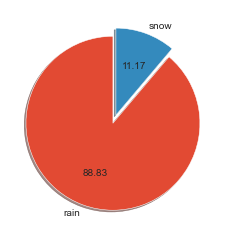

In [5]:
plt.pie(weather_df['Precip Type'].value_counts(),
    labels= weather_df['Precip Type'].value_counts().index,
    explode=[0.1,0],
    autopct='%0.2f', shadow=True, startangle=90
    );

plt.show()

### un balanced dataset

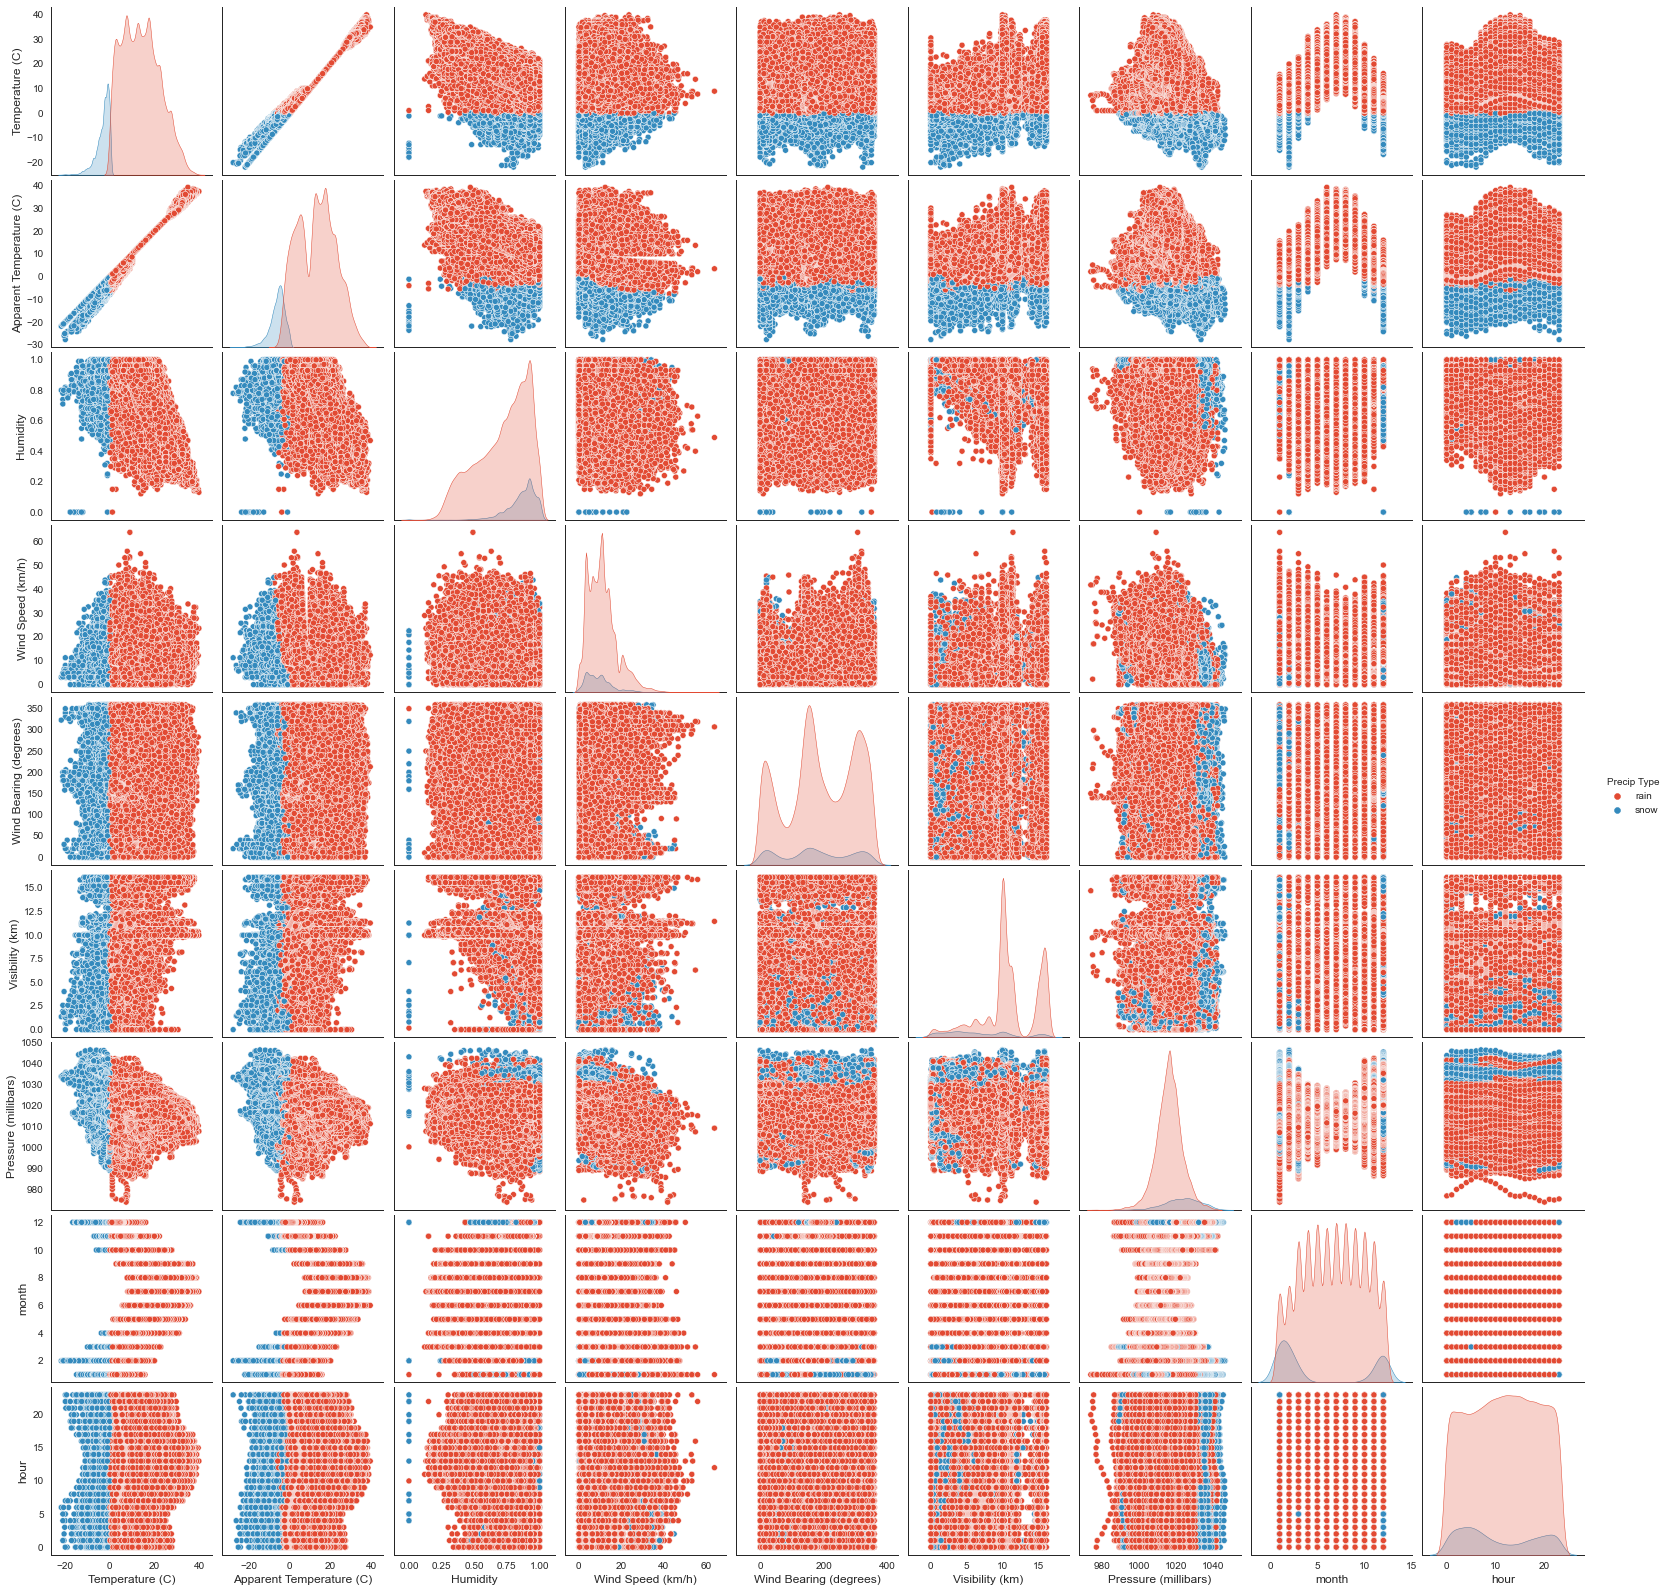

In [6]:
# plot the pair plot
sns.pairplot(weather_df, hue='Precip Type')

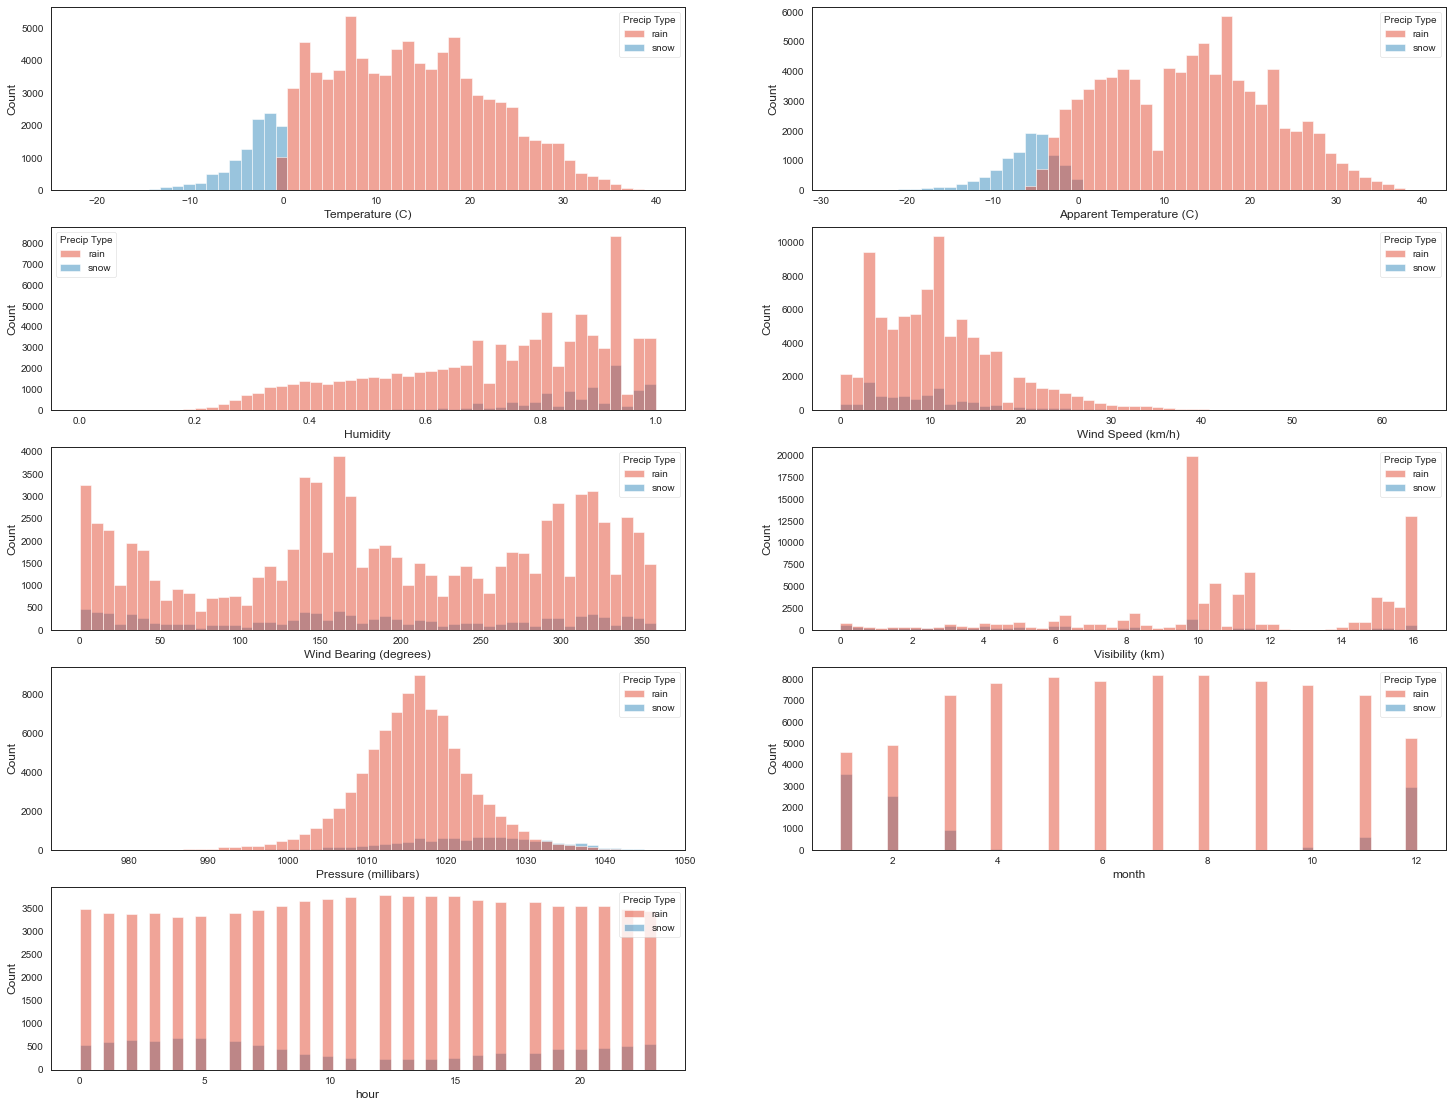

In [7]:
columns_lst = ['Temperature (C)', 'Apparent Temperature (C)',
                'Humidity',
                'Wind Speed (km/h)',
                'Wind Bearing (degrees)',
                'Visibility (km)',
                'Pressure (millibars)',
                'month', 'hour']

fig =plt.figure(figsize =(25,60))
for i, col in enumerate(columns_lst):
    plt.subplot(15, 2, i+1)
    sns.histplot(data= weather_df, x =col, bins=50, hue='Precip Type')
plt.show()

In [8]:
weather_df.groupby(['Summary', 'Precip Type'])['Apparent Temperature (C)'].agg(['mean', 'count']).sort_values(by='mean')

mean  count
Summary                             Precip Type                  
Breezy and Partly Cloudy            snow        -10.946032      7
Windy and Foggy                     snow        -10.577778      1
Breezy and Mostly Cloudy            snow        -10.094658     26
Breezy and Foggy                    snow         -9.893004     27
Breezy and Overcast                 snow         -9.751587     56
Windy and Overcast                  snow         -9.422222      3
Breezy                              snow         -9.302778     12
Clear                               snow         -6.774002   1392
Overcast                            snow         -6.370500   2600
Partly Cloudy                       snow         -6.302103   1720
Mostly Cloudy                       snow         -5.932349   1886
Foggy                               snow         -5.910416   2982
Breezy and Foggy                    rain          0.998611      8
Windy                               rain          2.009028      8
Dangerously Windy and Partly Cloudy rain          3.483333      1
Foggy                               rain          3.867063   4135
Windy and Overcast                  rain          4.633598     42
Breezy and Overcast                 rain          5.063536    472
Windy and Partly Cloudy             rain          6.551244     67
Breezy                              rain          7.013492     42
Overcast                            rain          8.039926  13916
Light Rain                          rain          8.560317     63
Rain                                rain          9.607222     10
Breezy and Mostly Cloudy            rain          9.676825    490
Windy and Mostly Cloudy             rain          9.754286     35
Drizzle                             rain         10.011681     39
Breezy and Partly Cloudy            rain         10.376019    379
Mostly Cloudy                       rain         12.897012  26028
Clear                               rain         13.735482   9354
Windy and Foggy                     rain         16.551852      3
Partly Cloudy                       rain         16.652423  29908
Humid and Mostly Cloudy             rain         20.886389     40
Breezy and Dry                      rain         21.111111      1
Humid and Overcast                  rain         21.515079      7
Humid and Partly Cloudy             rain         21.568301     17
Dry and Mostly Cloudy               rain         25.929365     14
Dry and Partly Cloudy               rain         25.982235     86
Windy and Dry                       rain         26.344444      1
Dry                                 rain         28.273529     34

In [9]:
# lets drop the hour, apparent temp and summary

In [10]:
# encode the month into three categories
weather_df['month_r'] = np.where(weather_df.month.isin([4,5,6,7,8,9]), 1,0)

weather_df['month_hs'] = np.where(weather_df.month.isin([1,2,12]), 1,0)

weather_df['month_s'] = np.where(weather_df.month.isin([3, 10,11]), 1,0)

In [11]:
# encode category variables using one hot encoder
le = LabelEncoder()
weather_df['Precip Type'] = le.fit_transform(weather_df['Precip Type'])

In [12]:
weather_df.head()

Formatted Date        Summary  Precip Type  Temperature (C)  \
0  2006-03-31 22:00:00+00:00  Partly Cloudy            0         9.472222   
1  2006-03-31 23:00:00+00:00  Partly Cloudy            0         9.355556   
2  2006-04-01 00:00:00+00:00  Mostly Cloudy            0         9.377778   
3  2006-04-01 01:00:00+00:00  Partly Cloudy            0         8.288889   
4  2006-04-01 02:00:00+00:00  Mostly Cloudy            0         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  month  hour  \
0                   251.0          15.8263               1015.13      3    22   
1                   259.0          15.8263               1015.63      3    23   
2                   204.0          14.9569               1015.94      4     0   
3                   269.0          15.8263               1016.41      4     1   
4                   259.0          15.8263               1016.51      4     2   

   month_r  month_hs  month_s  
0        0         0        1  
1        0         0        1  
2        1         0        0  
3        1         0        0  
4        1         0        0

In [13]:
# scale the numeric features

columns_to_scale = ['Temperature (C)',
                    'Humidity',
                    'Wind Speed (km/h)',
                    'Wind Bearing (degrees)',
                    'Visibility (km)',
                    'Pressure (millibars)',
                    ]

scaler_model = MinMaxScaler()
scaler_model = scaler_model.fit(weather_df[columns_to_scale])
weather_df[columns_to_scale]  = scaler_model.transform(weather_df[columns_to_scale])

In [14]:
weather_df.head()

Formatted Date        Summary  Precip Type  Temperature (C)  \
0  2006-03-31 22:00:00+00:00  Partly Cloudy            0         0.506975   
1  2006-03-31 23:00:00+00:00  Partly Cloudy            0         0.505085   
2  2006-04-01 00:00:00+00:00  Mostly Cloudy            0         0.505445   
3  2006-04-01 01:00:00+00:00  Partly Cloudy            0         0.487805   
4  2006-04-01 02:00:00+00:00  Mostly Cloudy            0         0.495365   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89           0.221130   
1                  7.227778      0.86           0.223399   
2                  9.377778      0.89           0.061523   
3                  5.944444      0.83           0.220877   
4                  6.977778      0.83           0.172970   

   Wind Bearing (degrees)  Visibility (km)  Pressure (millibars)  month  hour  \
0                0.699164            0.983              0.569559      3    22   
1                0.721448            0.983              0.576446      3    23   
2                0.568245            0.929              0.580716      4     0   
3                0.749304            0.983              0.587190      4     1   
4                0.721448            0.983              0.588567      4     2   

   month_r  month_hs  month_s  
0        0         0        1  
1        0         0        1  
2        1         0        0  
3        1         0        0  
4        1         0        0

In [15]:
corr_with_precip = weather_df.corr()['Precip Type'].drop('Precip Type')
corr_with_precip

Temperature (C)            -0.563533
Apparent Temperature (C)   -0.566085
Humidity                    0.232658
Wind Speed (km/h)          -0.067876
Wind Bearing (degrees)     -0.042112
Visibility (km)            -0.316487
Pressure (millibars)        0.298604
month                      -0.145750
hour                       -0.051243
month_r                    -0.354681
month_hs                    0.487814
month_s                    -0.077343
Name: Precip Type, dtype: float64

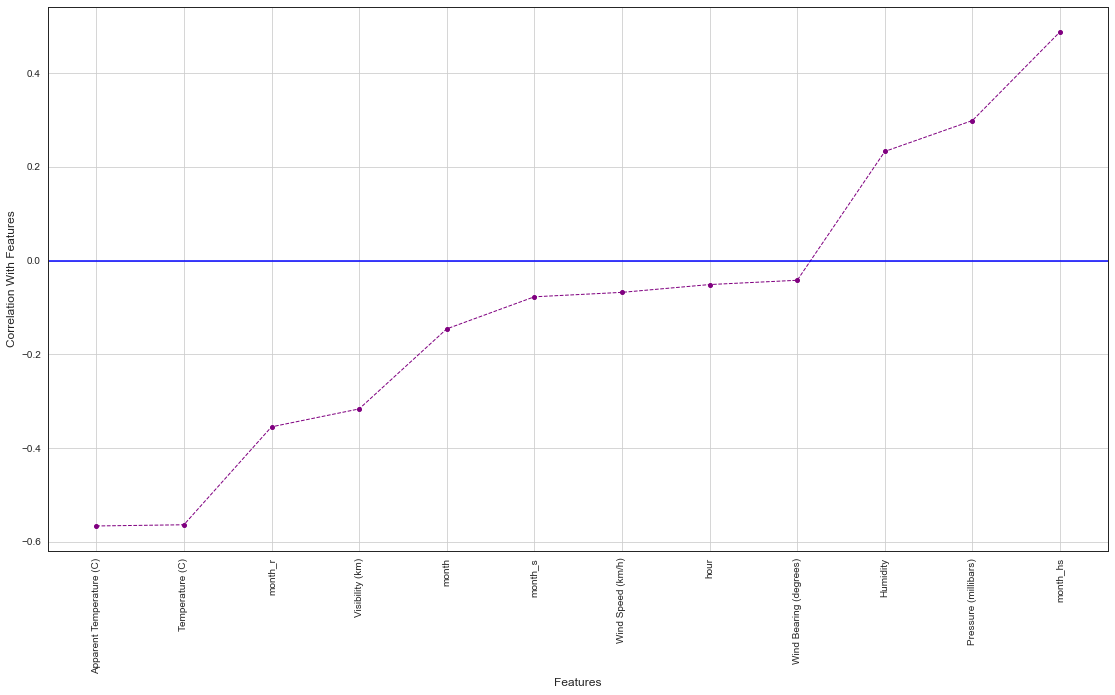

In [16]:
plt.subplots(figsize=(19,10))
plt.grid()
plt.plot((corr_with_precip.sort_values()), color="purple", lw=1, ls='--', marker='o', markersize=4)
plt.xticks(rotation=90)
plt.axhline(y=0 , c='b')
plt.xlabel('Features')
plt.ylabel('Correlation With Features')
plt.show()

<a id="4"></a>
# Perform various classification



In [17]:
weather_df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'month', 'hour', 'month_r', 'month_hs', 'month_s'],
      dtype='object')

In [18]:
# Low corrlation between wind bearing and apparent temperature
features = ['Temperature (C)',
                'Humidity',
                'Wind Speed (km/h)',
                'Visibility (km)',
                'Pressure (millibars)',
                'month_r', 'month_hs', 'month_s'
        ]

X =weather_df[features]
y =weather_df['Precip Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X_train.head()

Temperature (C)  Humidity  Wind Speed (km/h)  Visibility (km)  \
21336         0.640446      0.90           0.175240            0.926   
81985         0.435244      0.96           0.219617            0.039   
75263         0.569256      0.56           0.517146            0.943   
31251         0.641526      0.97           0.075643            0.620   
34637         0.596256      0.81           0.096571            0.890   

       Pressure (millibars)  month_r  month_hs  month_s  
21336              0.589394        1         0        0  
81985              0.529752        0         1        0  
75263              0.525620        0         0        1  
31251              0.587328        1         0        0  
34637              0.578237        1         0        0

Model name                : LR   
Accuracy Training Score   : 0.9885962282839604
Accuracy Test Score       : 0.9878538289110149
F1 Training Score         : 0.9469986068205221
F1 Test Score             : 0.9446424328819197
Auc                       : 0.9992481855013325


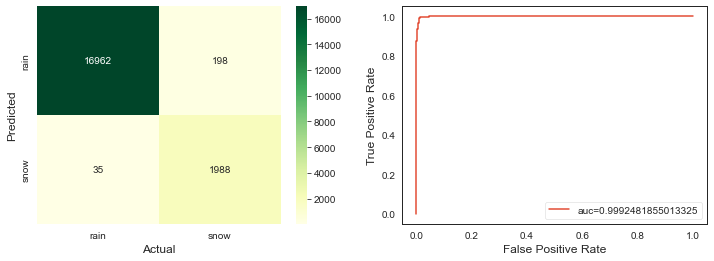

--------------------------------------------------

Model name                : KNNC 
Accuracy Training Score   : 0.9894563984933988
Accuracy Test Score       : 0.9821717145389146
F1 Training Score         : 0.9520876517619188
F1 Test Score             : 0.9203539823008849
Auc                       : 0.9910405318284196


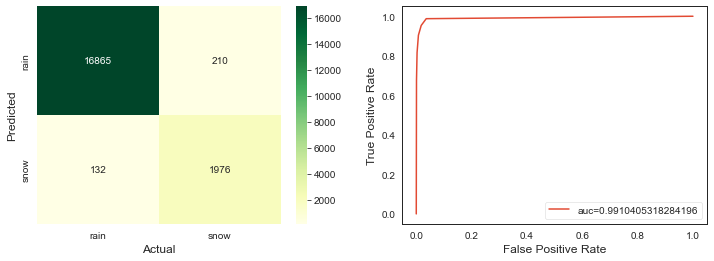

--------------------------------------------------

Model name                : SVC_L
Accuracy Training Score   : 0.9951908665563216
Accuracy Test Score       : 0.9950998279726841
F1 Training Score         : 0.9780995904801472
F1 Test Score             : 0.9782205746061168
Auc                       : 0.9998588901189763


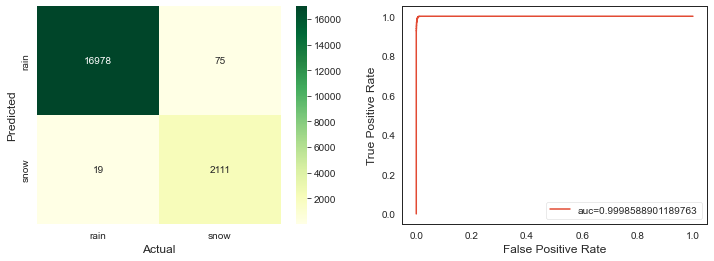

--------------------------------------------------

Model name                : SVC_RBF
Accuracy Training Score   : 0.9879836828317846
Accuracy Test Score       : 0.9870197570765782
F1 Training Score         : 0.9441956179639268
F1 Test Score             : 0.9408972228815572
Auc                       : 0.9991806045531635


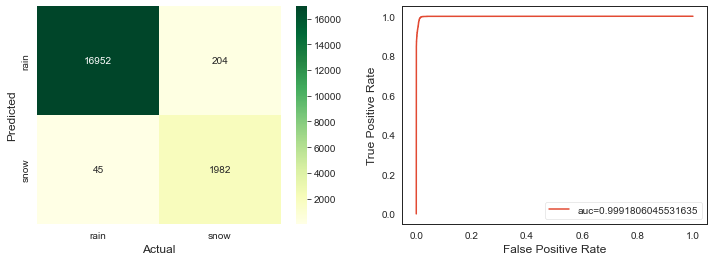

--------------------------------------------------

Model name                : SVC_poly
Accuracy Training Score   : 0.9943567621108056
Accuracy Test Score       : 0.9935880727727675
F1 Training Score         : 0.9749522762769711
F1 Test Score             : 0.9722033898305085
Auc                       : 0.9997804359318346


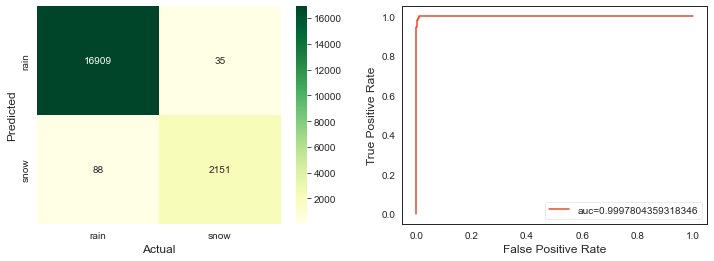

--------------------------------------------------

Model name                : DT   
Accuracy Training Score   :   1.0
Accuracy Test Score       :   1.0
F1 Training Score         :   1.0
F1 Test Score             :   1.0
Auc                       :   1.0


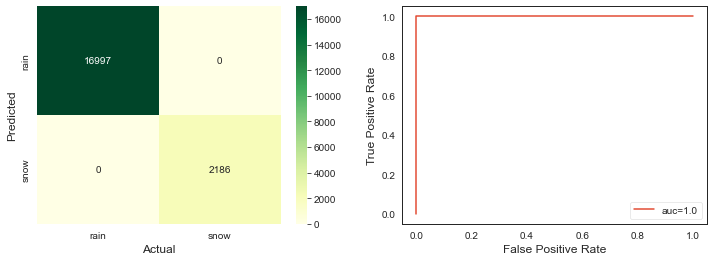

--------------------------------------------------

Model name                : RF   
Accuracy Training Score   :   1.0
Accuracy Test Score       :   1.0
F1 Training Score         :   1.0
F1 Test Score             :   1.0
Auc                       :   1.0


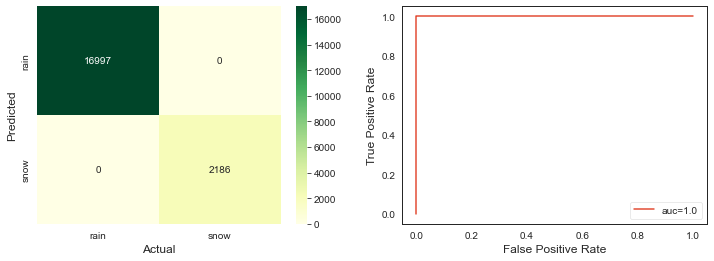

--------------------------------------------------

Model name                : XGB  
[22:16:27] WARNING: ..\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy Training Score   :   1.0
Accuracy Test Score       :   1.0
F1 Training Score         :   1.0
F1 Test Score             :   1.0
Auc                       :   1.0


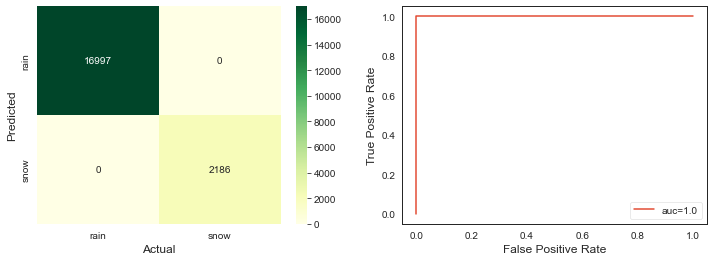

--------------------------------------------------

Model name                : catboost
Accuracy Training Score   :   1.0
Accuracy Test Score       :   1.0
F1 Training Score         :   1.0
F1 Test Score             :   1.0
Auc                       :   1.0


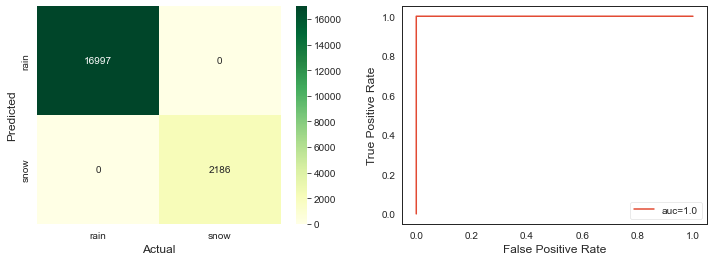

--------------------------------------------------



In [20]:
# Models
models = {
            "LR"    : LogisticRegression(solver='liblinear', random_state=42),
            "KNNC"  : KNeighborsClassifier(),
            "SVC_L"   : SVC(kernel='linear', random_state=42, probability=True),
            "SVC_RBF"   : SVC(kernel='rbf', random_state=42,gamma=0.1, probability=True),
            "SVC_poly"   : SVC(kernel='poly', random_state=42, degree=2, probability=True),
            "DT"    : DecisionTreeClassifier(random_state=42),
            "RF"    : RandomForestClassifier(random_state=42),
            "XGB"  : XGBClassifier(random_state=42),
            "catboost" : CatBoostClassifier(verbose=False, random_state=42)
            }

# store the result to be used in comparring
results = []

# loop over each model
for name, model in models.items():
    # Print model name
    print('{0:25} : {1:5}'.format('Model name', name ) )

    # Fit the model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # measure the Accuracy
    Training_Score = model.score(X_train, y_train)
    Test_Score = model.score(X_test, y_test)

    # measure f1_score
    Training_f1_Score = f1_score(y_train, y_train_pred)
    Test_f1_Score = f1_score(y_test, y_test_pred)

    # AUC
    auc = roc_auc_score(y_test, y_pred_proba)

    # print the Accuracy and f1_score
    print('{0:25} : {1:5}'.format('Accuracy Training Score',  Training_Score) )
    print('{0:25} : {1:5}'.format('Accuracy Test Score',  Test_Score) )
    print('{0:25} : {1:5}'.format('F1 Training Score',  Training_f1_Score ) )
    print('{0:25} : {1:5}'.format('F1 Test Score',  Test_f1_Score) )
    print('{0:25} : {1:5}'.format('Auc',  auc) )

    # Confusion matrix and Receiver Operating Characteristic(ROC) CURVE
    plt.figure(figsize=(12,4))
    # Confusion matrix
    plt.subplot(1,2,1)
    cm = np.array(confusion_matrix(y_test, y_test_pred)).T
    sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g',xticklabels=le.classes_, yticklabels=le.classes_)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # ROC
    plt.subplot(1,2,2)
    fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

    print('-'*50 + '\n')

    temp ={'Name':name, 'AUC':auc,
            'ACC_Training_Score':Training_Score, 'ACC_Test_Score':Test_Score,
            'F1_Training_Score':Training_f1_Score, 'F1_Test_Score':Test_f1_Score}
    results.append(temp)

Name       AUC  ACC_Training_Score  ACC_Test_Score  F1_Training_Score  \
1      KNNC  0.991041            0.989456        0.982172           0.952088   
3   SVC_RBF  0.999181            0.987984        0.987020           0.944196   
0        LR  0.999248            0.988596        0.987854           0.946999   
4  SVC_poly  0.999780            0.994357        0.993588           0.974952   
2     SVC_L  0.999859            0.995191        0.995100           0.978100   
5        DT  1.000000            1.000000        1.000000           1.000000   
6        RF  1.000000            1.000000        1.000000           1.000000   
7       XGB  1.000000            1.000000        1.000000           1.000000   
8  catboost  1.000000            1.000000        1.000000           1.000000   

   F1_Test_Score  
1       0.920354  
3       0.940897  
0       0.944642  
4       0.972203  
2       0.978221  
5       1.000000  
6       1.000000  
7       1.000000  
8       1.000000

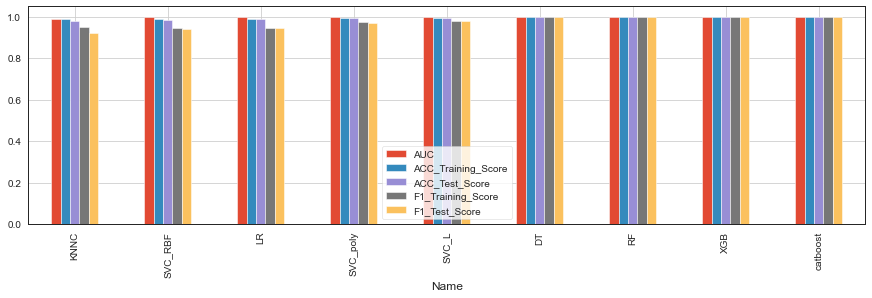

In [21]:
results_df = pd.DataFrame(results).sort_values('AUC')
display(results_df)
results_df.plot(x="Name", y=['AUC',	'ACC_Training_Score',	'ACC_Test_Score',	'F1_Training_Score',	'F1_Test_Score'], kind="bar",figsize=(15,4))
plt.grid()
plt.show()

<a id="5"></a>
# Final Model

In [22]:
# get the best model
results_df[results_df.AUC == np.max(results_df.AUC)]

Name  AUC  ACC_Training_Score  ACC_Test_Score  F1_Training_Score  \
5        DT  1.0                 1.0             1.0                1.0   
6        RF  1.0                 1.0             1.0                1.0   
7       XGB  1.0                 1.0             1.0                1.0   
8  catboost  1.0                 1.0             1.0                1.0   

   F1_Test_Score  
5            1.0  
6            1.0  
7            1.0  
8            1.0

### so we will use Decision tree model

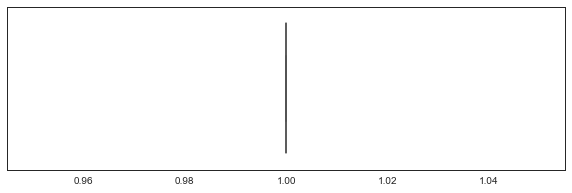

In [23]:
# Final model
DT_model = DecisionTreeClassifier(random_state=42)

# create cross val
cross_DT = cross_val_score(DT_model, X_train, y_train, cv=5)

plt.subplots(figsize=(10,3))
sns.boxplot(cross_DT)
plt.show()

In [24]:
cross_DT


array([1., 1., 1., 1., 1.])

In [25]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [26]:
 # Predictions
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)
y_pred_proba = DT_model.predict_proba(X_test)[:, 1]

# measure the Accuracy
Training_Score = DT_model.score(X_train, y_train)
Test_Score = DT_model.score(X_test, y_test)

# measure f1_score
Training_f1_Score = f1_score(y_train, y_train_pred)
Test_f1_Score = f1_score(y_test, y_test_pred)

# AUC
auc = roc_auc_score(y_test, y_pred_proba)

# print the Accuracy and f1_score
print('{0:25} : {1:5}'.format('Accuracy Training Score',  Training_Score) )
print('{0:25} : {1:5}'.format('Accuracy Test Score',  Test_Score) )
print('{0:25} : {1:5}'.format('F1 Training Score',  Training_f1_Score ) )
print('{0:25} : {1:5}'.format('F1 Test Score',  Test_f1_Score) )
print('{0:25} : {1:5}'.format('Auc',  auc) )

Accuracy Training Score   :   1.0
Accuracy Test Score       :   1.0
F1 Training Score         :   1.0
F1 Test Score             :   1.0
Auc                       :   1.0


### This multiply model is very accurate adjusted R^2 is 0.999 and MAE is 0.08 degree

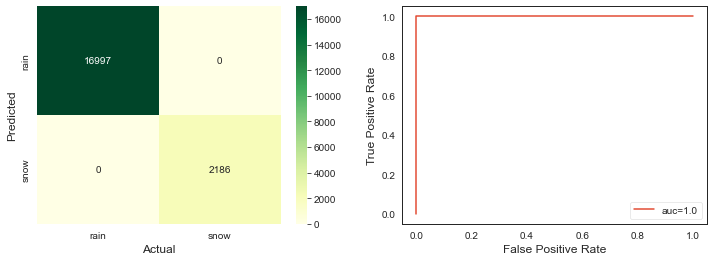

In [27]:
# Confusion matrix and Receiver Operating Characteristic(ROC) CURVE
plt.figure(figsize=(12,4))
# Confusion matrix
plt.subplot(1,2,1)
cm = np.array(confusion_matrix(y_test, y_test_pred)).T
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGn" ,fmt='g',xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Actual')
plt.ylabel('Predicted')

# ROC
plt.subplot(1,2,2)
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="auc="+str(auc))
plt.legend(loc=4)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### ACCURACY IS 100%

In [28]:
#  classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16997
           1       1.00      1.00      1.00      2186

    accuracy                           1.00     19183
   macro avg       1.00      1.00      1.00     19183
weighted avg       1.00      1.00      1.00     19183



### the precision is 100% and Recall is 100%

<a id="6"></a>
# My Models

### logistic regresson

In [29]:
from mylib import Logistic_Regression_Batch_GD

In [30]:
my_logreg = Logistic_Regression_Batch_GD(alpha=13, iterations=600)

my_logreg.fit(X_train.values, y_train)

array([  3.52926663, -28.77032112,   1.84932207,   0.40697177,
        -0.12084729,   2.76521197,  -2.03363517,   3.08794771,
         2.47495408])

In [31]:
my_logreg.accuracy(X_train, y_train)

0.9764626151780943

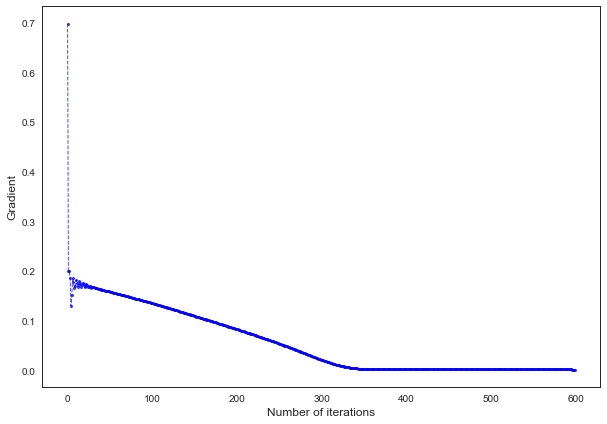

In [32]:
my_logreg.plot_GD()

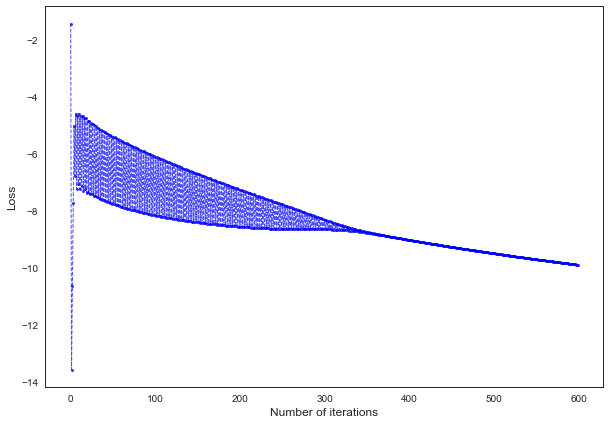

In [33]:
my_logreg.plot_loss()

### KNN

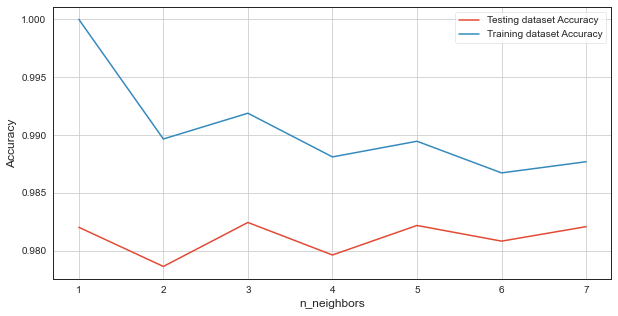

In [34]:
# How sensitive is k-NN classification accuracy to the choice of the 'k' parameter
neighbors = np.arange(1, 8)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.figure(figsize=(10,5))
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.xticks(neighbors)
plt.grid()
plt.show()

In [35]:
# use k=5

In [36]:
from mylib import KNNClassifier

In [39]:
my_knn = KNNClassifier()
my_knn.fit(X_train.values , y_train.values)

In [40]:
y_pred = my_knn.predict(X_test.values)
y_pred[:20]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.])

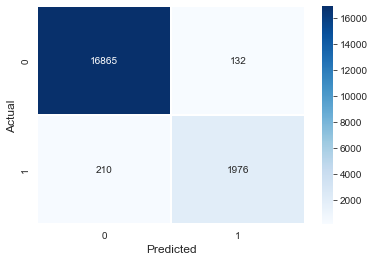

In [41]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, linewidths=0.1, cmap='Blues',fmt='')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [42]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     16997
           1       0.94      0.90      0.92      2186

    accuracy                           0.98     19183
   macro avg       0.96      0.95      0.96     19183
weighted avg       0.98      0.98      0.98     19183

